Primeiras linhas do dataset:
         0         1    2    3    4    5    6    7    8    9    10   11   12  \
0  0.833333  0.019103  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.666667  0.126231  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.666667  0.178560  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.500000  0.344442  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4  0.333333  0.008637  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    13   14   15   16  
0  0.0  0.0  1.0  0.0  
1  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3100 non-null   float64
 1   1       3100 non-null   float64
 2   2       3100 non-null   float64
 3   3       3100 non-null   floa

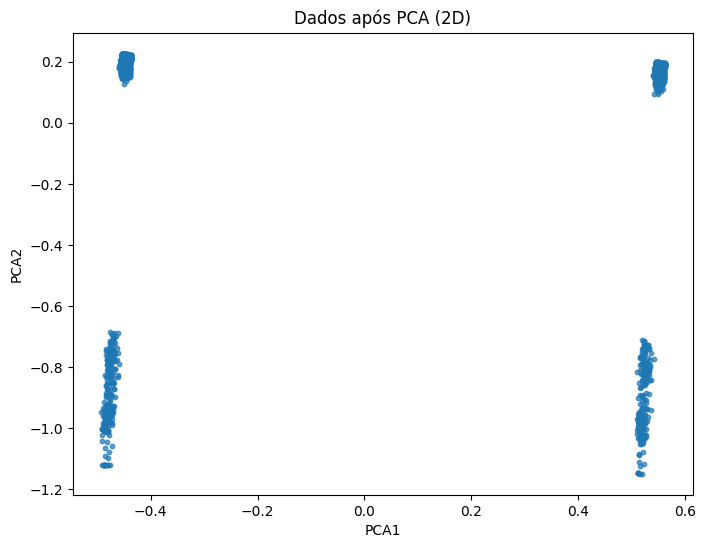

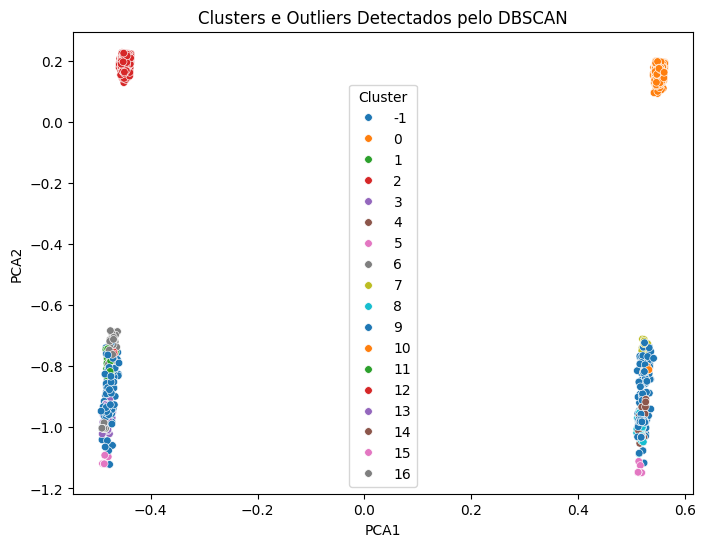

Número de outliers detectados: 171
Outliers detectados:
          PCA1      PCA2  Cluster
18    0.525589 -0.841168       -1
27   -0.471538 -1.059333       -1
60    0.517943 -0.764170       -1
107   0.514535 -0.945372       -1
141  -0.480855 -0.852298       -1
...        ...       ...      ...
3094  0.519493 -0.982110       -1
3095 -0.472673 -0.989320       -1
3097 -0.475362 -0.925868       -1
3098 -0.492873 -0.947126       -1
3099 -0.474412 -0.833142       -1

[171 rows x 3 columns]

Relatório Final:
Parâmetros utilizados: eps=0.2, min_samples=9
Número total de clusters (excluindo outliers): 17
Número de outliers detectados: 171


In [13]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Carregar o dataset
df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))

# Inspecionar os dados
print("Primeiras linhas do dataset:")
print(df.head())
print("\nInformações gerais:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

# Reduzir dimensionalidade com PCA para visualização em 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Visualizar os dados em 2D
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], s=10, alpha=0.7)
plt.title('Dados após PCA (2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


eps = 0.2  
min_samples = 9  
dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
labels = dbscan.fit_predict(df)

df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=df_pca,
    palette='tab10', legend='full', s=30
)
plt.title('Clusters e Outliers Detectados pelo DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='best')
plt.show()


outliers = df_pca[df_pca['Cluster'] == -1]
print(f"Número de outliers detectados: {len(outliers)}")
print("Outliers detectados:")
print(outliers)

# Relatório final
print("\nRelatório Final:")
print(f"Parâmetros utilizados: eps={eps}, min_samples={min_samples}")
print(f"Número total de clusters (excluindo outliers): {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Número de outliers detectados: {len(outliers)}")